In [1]:
import skimage.io
from skimage.filters import threshold_otsu
import numpy as np

import matplotlib.pyplot as plt

In [2]:
def screenBlend(arr1, arr2):
    blend = 1 - (1-arr1)*(1-arr2)
    return blend

In [3]:
def normalizeRange(arr):
    thresh = threshold_otsu(arr)
    pxforeground = arr[arr>thresh]
    
    maxpx = np.percentile(pxforeground, 95)
    imgnorm = (arr) / (maxpx)
    
    return imgnorm, maxpx

### Loading Cropped tif image and setting channel id's
Image is the cropped part for the figure, full image is hosted on a seperate server or can be made available on request  
Image dimensions are [ x , y , ch ], (note skimage seems to order image dimensions with planes of image on rightmost array for planes<4)

#### Channel Order
0: Barcode 1 - Targeting ONL layer (outer nuclear layer)  
1: Barcode 2 - Targeting BP layer (bipolar)  
2: Barcode 3 - Targeting RGC layer (retinal ganglion cells)  
3: DAPI stain - Not used for figure  

In [4]:
PATH = "NJS128_retinaimg/"
rawimg = skimage.io.imread(PATH+"NJS128-0-postbc-B2-crop.tif")

In [5]:
#Take first three channels for figure plotting
### Normalize all images and convert to color###
imgcolor = []
for i in range(3):
    imgnorm,_ = normalizeRange(rawimg[:,:,i])
    imgcolor.append(skimage.color.gray2rgb(imgnorm))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


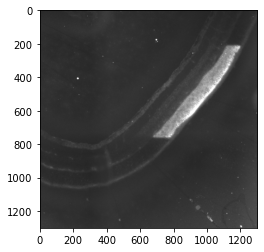

In [6]:
#take a look at the first layer - barcode 1
plt.imshow(imgcolor[0])

#### Set color for the three channels
Only using magenta, cyan and green for these 3

In [7]:
#Color dictionary of channels that will be multiplied by the img
#add more color schemes here if you want more options
COLOR_DICT={"green"      :[0,1,0],
            "cyan"       :[0,1,1],
            "magenta"    :[1,0,1],
            "red"        :[1,0,0],
            "yellow"     :[1,1,0],
            "blue"       :[0,0,1],
            "dark orange":[1,0.55,0],
            "violet"     :[0.56, 0, 1],
            "violet gray":[0.866,0.68,0.96]}

In [8]:
def setColor(img, **kwargs):
    ch = COLOR_DICT.get(
        kwargs.get("color")
    )
    
    newimg = img*ch
    return newimg

In [9]:
#Set colors for 3 channels
imgcolor[0] = setColor(imgcolor[0], color='magenta')
imgcolor[1] = setColor(imgcolor[1], color='cyan')
imgcolor[2] = setColor(imgcolor[2], color='green')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


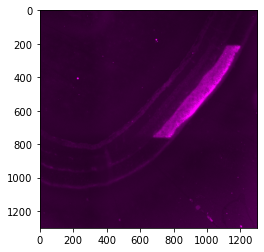

In [10]:
#Check color for ONL layer
plt.imshow(imgcolor[0])

In [11]:
blend = screenBlend(imgcolor[0],imgcolor[1])
blend = screenBlend(blend, imgcolor[2])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


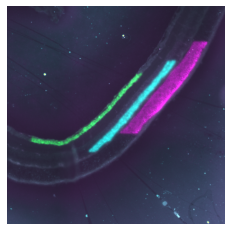

In [12]:
plt.imshow(blend, vmax=1)
plt.axis("off")
plt.savefig('NJS128-postbc-B2-RetinaOverlay.png', dpi=1000, bbox_inches='tight', transparent='True', pad_inches=0)

In [13]:
#Note
#Pixel scaling for the 1300x1300 image is 0.6556 microns /pixel
#so a 100 um scale bar would be around 152.5 px in length.